원인 부분
- 유전 -> 유전자의 이상을 찾을 수 있는 경우는 전체 당뇨병의 1%미만에 불과
- 환경 -> 고령, 비만, 스트레스, 임신, 감염, 약물 등. 이는 유전적 요인과 다르게 노력으로 어느정도 피할 수 있음
- 최근 과식 및 운동량 감소로 비만증 증가 -> 당뇨병이 생길 위험성이 증가한다

진단 부분
- 경구포도당내용평가검사(OGTT)에서 2시간 후 혈장 포도당 200mg/dL일 경우 당뇨 진단

가설1 혈당이 높으면 당뇨일 가능성이 크다
- 귀무: 혈당이 140미만이면 당뇨가 아니다
- 대립: 혈당이 140이상이면 당뇨이다

가설2 비만이면 당뇨일 가능성이 크다
- 귀무: BMI가 30미만이면 당뇨가 아니다
- 대립: BMI가 30이상이면 당뇨이다

가설검정시 어떤 검정 써야하나요..?

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

In [30]:
# 데이터 로드
df_origin= pd.read_csv('Diabetes.csv')
df_origin.shape

(768, 9)

In [31]:
# 결측치 없음
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

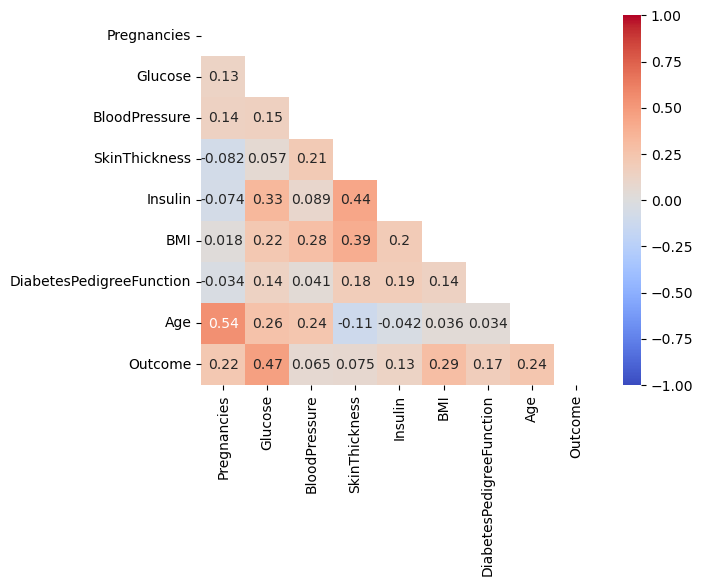

In [43]:
# 칼럼별 상관분석
df_origin_corr = df_origin.corr()

mask = np.triu(np.ones_like(df_origin_corr))
sns.heatmap(df_origin_corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1, mask=mask)


#### 상관관계 상위 5개 scatterplot시각화
- `나이` `임신` 0.54
- `나이` `혈당` 0.47
- `삼두근피부두께` `인슐린` 0.44
- `삼두근피부두께` `유전력` 0.39
- `혈당` `인슐린` 0.33


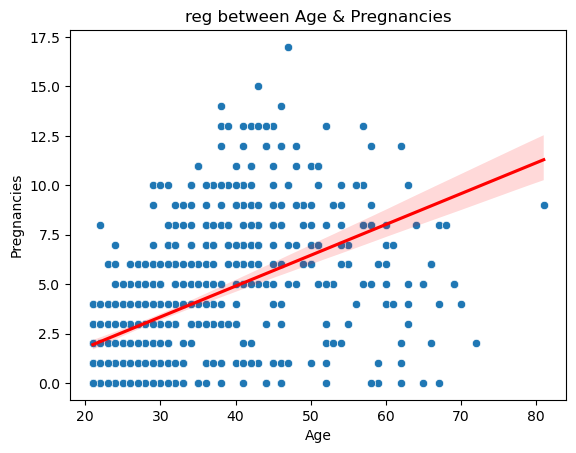

In [116]:
# `나이` - `임신` 0.54
sns.scatterplot(x='Age', y='Pregnancies', data=df_origin)
sns.regplot(x='Age', y='Pregnancies', data=df_origin, scatter=False, color='red')
plt.title('reg between Age & Pregnancies')

plt.show()

Text(0.5, 1.0, 'reg between Age & Glucose')

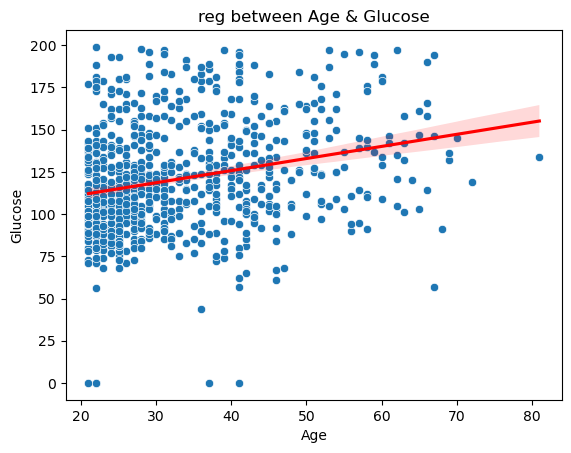

In [117]:
# `나이` - `혈당` 0.47
sns.scatterplot(x='Age', y='Glucose', data=df_origin)
sns.regplot(x='Age', y='Glucose', data=df_origin, scatter=False, color='red')
plt.title('reg between Age & Glucose')

Text(0.5, 1.0, 'reg between SkinThickness & Insulin')

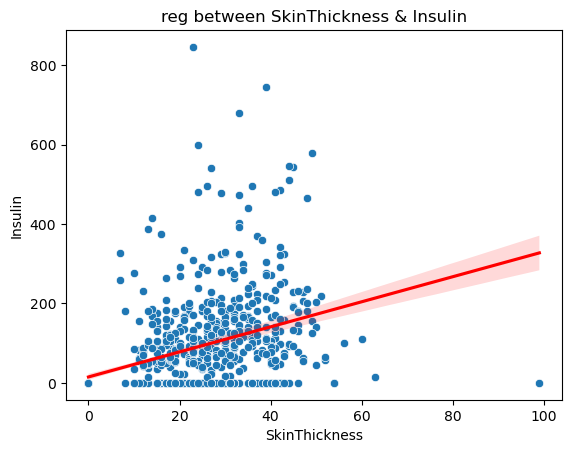

In [118]:
# `삼두근피부두께` - `인슐린` 0.44
sns.scatterplot(x='SkinThickness', y='Insulin', data=df_origin)
sns.regplot(x='SkinThickness', y='Insulin', data=df_origin, scatter=False, color='red')
plt.title('reg between SkinThickness & Insulin')

Text(0.5, 1.0, 'reg between SkinThickness & DiabetesPedigreeFunction')

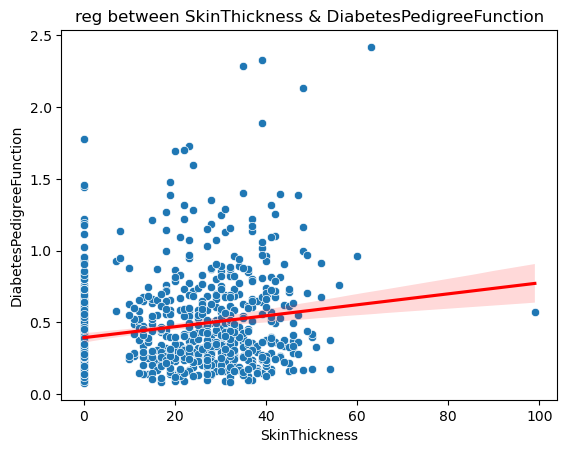

In [119]:
# `삼두근피부두께` - `유전력` 0.39
sns.scatterplot(x='SkinThickness', y='DiabetesPedigreeFunction', data=df_origin)
sns.regplot(x='SkinThickness', y='DiabetesPedigreeFunction', data=df_origin, scatter=False, color='red')
plt.title('reg between SkinThickness & DiabetesPedigreeFunction')

Text(0.5, 1.0, 'reg between Glucose & Insulin')

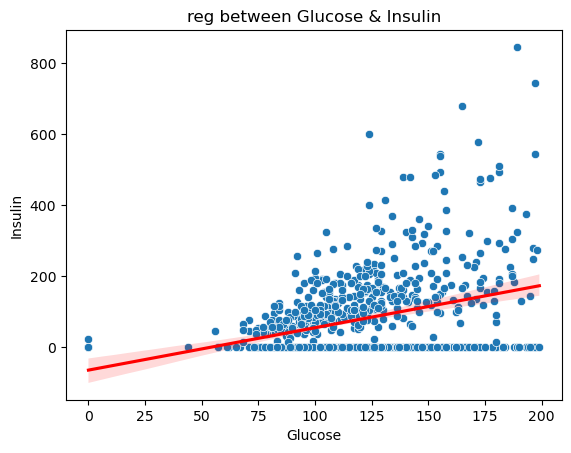

In [120]:
# `혈당` - `인슐린` 0.33
sns.scatterplot(x='Glucose', y='Insulin', data=df_origin)
sns.regplot(x='Glucose', y='Insulin', data=df_origin, scatter=False, color='red')
plt.title('reg between Glucose & Insulin')

---
## 당뇨 진단기준 중 하나 : `Glucose`가 200 이상이면 당뇨 판정

In [68]:
Glucose_200under_cnt = (df_origin['Glucose'] < 200).sum()
print(f'{Glucose_200under_cnt}명 \t Glucose 200 미만')

Glucose_200upper_cnt = (df_origin['Glucose'] >= 200).sum()
print(f'{Glucose_200upper_cnt}명 \t Glucose 200 이상')

# 진단기준(200mg/dL이상)을 넘는 사람은 없음

768명 	 Glucose 200 미만
0명 	 Glucose 200 이상


In [121]:
df_origin['Glucose'].describe()
# 상위 25% 인원을 위험군으로 정의

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

192명 	 Glucose 140.25이상(상위25%)


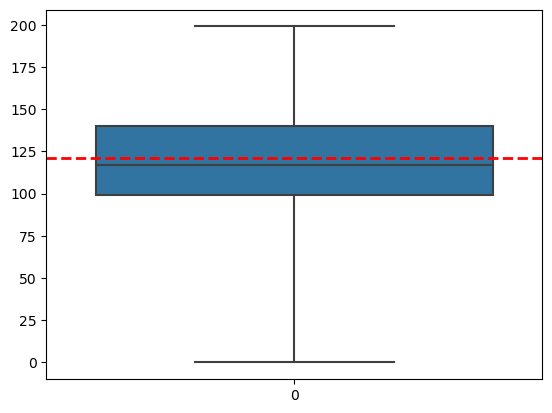

In [122]:
Glucose_140upper_cnt = (df_origin['Glucose'] >= 140.25).sum()
print(f'{Glucose_140upper_cnt}명 \t Glucose 140.25이상(상위25%)')

sns.boxplot(data=df_origin['Glucose'], whis=[0, 100])

Glucose_mean_value = df_origin['Glucose'].mean()
plt.axhline(Glucose_mean_value, color='r', linestyle='--', linewidth=2)

plt.show()

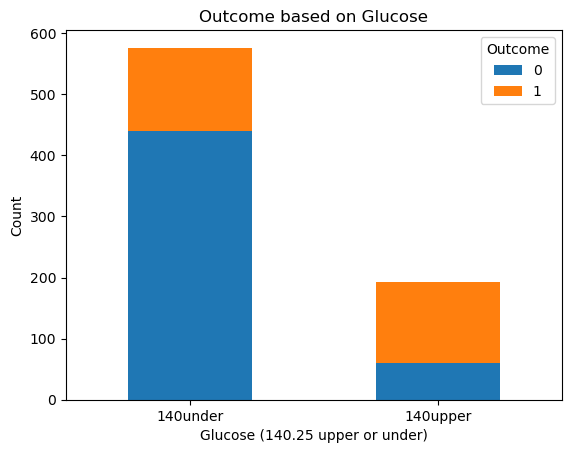

혈당 위험군의 당뇨 진단비율	: 68.75%
혈당 비위험군의 당뇨 진단비율	: 23.61%


In [126]:
grouped_data = df_origin.groupby(df_origin['Glucose'] >= 140.25)['Outcome'].value_counts().unstack()

grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Glucose (140.25 upper or under)')
plt.ylabel('Count')
plt.title('Outcome based on Glucose')
plt.xticks([0, 1], ['140under', '140upper'], rotation=0)
plt.legend(title='Outcome')
plt.show()

upper = ((df_origin['Glucose'] >= 140.25) & (df_origin['Outcome'] == 1)).sum() / (df_origin['Glucose'] >= 140.25).sum() *100
print(f'혈당 위험군의 당뇨 진단비율\t: {upper:.2f}%')

under = ((df_origin['Glucose'] < 140.25) & (df_origin['Outcome'] == 1)).sum() / (df_origin['Glucose'] < 140.25).sum() *100
print(f'혈당 비위험군의 당뇨 진단비율\t: {under:.2f}%')

---
## 비만 정도에 따른 분석

In [128]:
# BMI 수치에 따른 인원수
others_bmi = (df_origin['BMI'] < 20).sum()
print(f'{others_bmi}명 \t BMI 20 미만')

normal_bmi = ((df_origin['BMI'] < 25) & (df_origin['BMI'] >= 20)).sum()
print(f'{normal_bmi}명 \t 정상')

over_bmi = ((df_origin['BMI'] < 30) & (df_origin['BMI'] >= 25)).sum()
print(f'{over_bmi}명 \t 과체중(1도비만)')

obesity_bmi = ((df_origin['BMI'] < 40) & (df_origin['BMI'] >= 30)).sum()
print(f'{obesity_bmi}명 \t 비만(2도비만)')

severeOvesity_bmi = (df_origin['BMI'] >= 40).sum()
print(f'{severeOvesity_bmi}명 \t 고도비만')

24명 	 BMI 20 미만
93명 	 정상
179명 	 과체중(1도비만)
374명 	 비만(2도비만)
98명 	 고도비만


- BMI수치 30을 기준으로 일반/위험군 구분

In [134]:
df_BMI_good = df_origin[df_origin['BMI'] < 30]
df_BMI_danger = df_origin[df_origin['BMI'] >= 30]